In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_blobs

In [3]:
data = make_blobs(n_samples=300,n_features=2, 
                     centers=2,cluster_std=1,random_state=101)

In [4]:
data

(array([[ -8.87772115,  -6.76007802],
        [  0.630638  ,   3.10707466],
        [ -0.24060881,   2.82068999],
        [ -7.83909113,  -8.20754485],
        [-10.9729082 ,  -7.39067645],
        [-10.81648852,  -5.82372891],
        [  0.96977807,   0.50825184],
        [-10.29728144,  -7.21832357],
        [  0.04271579,   3.50389089],
        [  0.15391601,   2.19349145],
        [ -9.81008003,  -5.35480445],
        [-11.18334003,  -6.7004804 ],
        [  0.51876688,   3.39210906],
        [ -8.09111654,  -6.92631627],
        [  1.1112886 ,   0.704398  ],
        [ -7.49469451,  -7.06186612],
        [ -0.75249891,   2.31574949],
        [  0.72046137,   1.63484242],
        [ -0.80867204,   1.41371822],
        [  1.13010192,  -0.25418504],
        [-10.6252148 ,  -6.71479817],
        [ -0.06311641,   3.15682868],
        [  0.56609951,   3.41000402],
        [ -9.10474956,  -7.83047821],
        [-11.33926304,  -7.83622233],
        [  0.29639341,   2.06317757],
        [ -0

In [5]:
X,y = data

In [6]:
y

array([1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0])

In [7]:
np.random.seed(seed=101)
z_noise = np.random.normal(size=len(X))
z_noise = pd.Series(z_noise)

In [8]:
z_noise

0      2.706850
1      0.628133
2      0.907969
3      0.503826
4      0.651118
         ...   
295    1.523750
296    1.290230
297   -1.478319
298    0.214234
299   -0.240510
Length: 300, dtype: float64

In [9]:
feat = pd.DataFrame(X)

In [10]:
feat = pd.concat([feat,z_noise], axis=1)

In [11]:
feat.columns = ['X1','X2','X3']

In [12]:
feat.head()

,X1,X2,X3
0,-8.877721,-6.760078,2.706850
1,0.630638,3.107075,0.628133
2,-0.240609,2.820690,0.907969
3,-7.839091,-8.207545,0.503826
4,-10.972908,-7.390676,0.651118


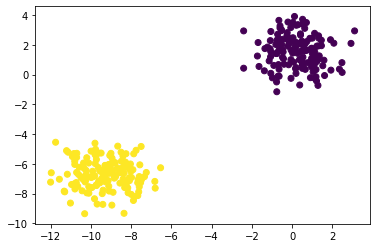

In [13]:
plt.scatter(feat['X1'],feat['X2'],c=y)

In [14]:
from mpl_toolkits.mplot3d import Axes3D

In [15]:
%matplotlib notebook

<IPython.core.display.Javascript object>


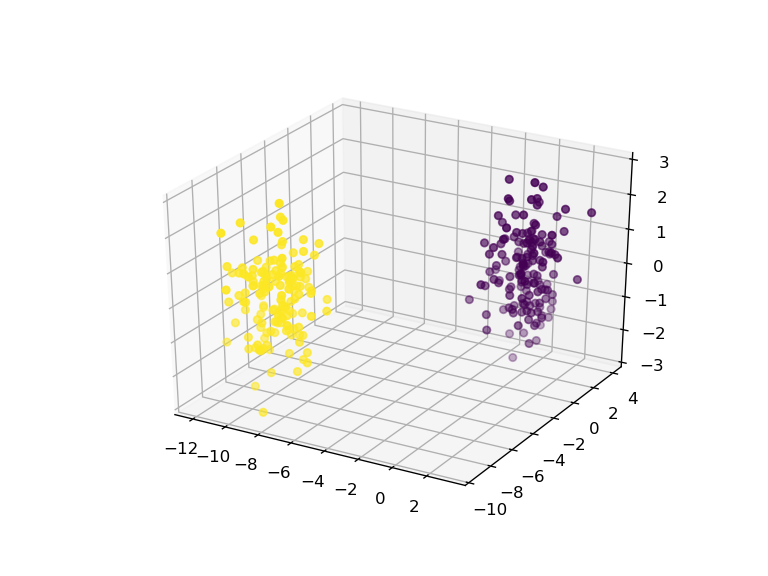

In [38]:
fig =plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(feat['X1'],feat['X2'],feat['X3'],c=y)

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

### creating encoder of shape 3-->2-->3

In [187]:
encoder = Sequential()
encoder.add(Dense(units=2,activation='relu',input_shape=[3]))# i thot input_shape should be in tuple form hmm... read api 

In [188]:
decoder = Sequential()
decoder.add(Dense(units=3,activation='relu',input_shape=[2]))

In [189]:
autoencoder=Sequential([encoder,decoder])

In [190]:
autoencoder.compile(loss='mse',optimizer=SGD(lr=1.5))

In [191]:
from sklearn.preprocessing import MinMaxScaler

In [192]:
scaler = MinMaxScaler()
scaled_data =scaler.fit_transform(feat)

In [193]:
feat.shape

(300, 3)

In [194]:
autoencoder.fit(scaled_data,scaled_data,epochs=20)

Train on 300 samples
Epoch 1/20
300/300 [==============================] - 1s 3ms/sample - loss: 0.2573
Epoch 2/20
300/300 [==============================] - 0s 130us/sample - loss: 0.2175
Epoch 3/20
300/300 [==============================] - 0s 123us/sample - loss: 0.2164
Epoch 4/20
300/300 [==============================] - 0s 146us/sample - loss: 0.2174
Epoch 5/20
300/300 [==============================] - 0s 215us/sample - loss: 0.2177
Epoch 6/20
300/300 [==============================] - 0s 212us/sample - loss: 0.2159
Epoch 7/20
300/300 [==============================] - 0s 193us/sample - loss: 0.2152
Epoch 8/20
300/300 [==============================] - 0s 227us/sample - loss: 0.2157
Epoch 9/20
300/300 [==============================] - 0s 156us/sample - loss: 0.2215
Epoch 10/20
300/300 [==============================] - 0s 135us/sample - loss: 0.2151
Epoch 11/20
300/300 [==============================] - 0s 155us/sample - loss: 0.2156
Epoch 12/20
300/300 [=======================

In [195]:
#running through encoder half
encoded_2dim = encoder.predict(scaled_data)

In [196]:
encoded_2dim

array([[5.66169620e-02, 0.00000000e+00],
       [1.16407013e+00, 0.00000000e+00],
       [1.10639191e+00, 0.00000000e+00],
       [1.18706524e-02, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00],
       [7.19090700e-02, 0.00000000e+00],
       [1.00243020e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00],
       [1.19114637e+00, 0.00000000e+00],
       [1.07828188e+00, 0.00000000e+00],
       [1.38801187e-01, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00],
       [1.18379807e+00, 0.00000000e+00],
       [1.04647249e-01, 0.00000000e+00],
       [1.02291465e+00, 0.00000000e+00],
       [1.04459733e-01, 0.00000000e+00],
       [1.05552411e+00, 0.00000000e+00],
       [1.05033207e+00, 0.00000000e+00],
       [9.68271315e-01, 0.00000000e+00],
       [9.41178024e-01, 0.00000000e+00],
       [1.01416707e-02, 0.00000000e+00],
       [1.13119817e+00, 0.00000000e+00],
       [1.20265007e+00, 0.00000000e+00],
       [2.38268077e-03, 0.00000000e+00],
       [0.000000

In [197]:
encoded_2dim.shape

(300, 2)

<IPython.core.display.Javascript object>


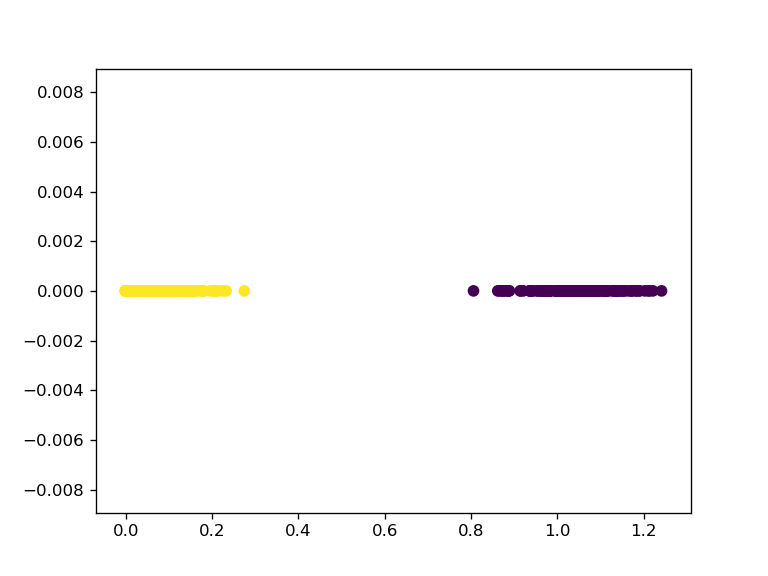

In [198]:
plt.scatter(encoded_2dim[:,0],encoded_2dim[:,1],c=y)